# Full Implementation of training a 2-layer Neural Network

## ● Forward Propagation & Backword Propagation & Gradient Descent Example
-------------------

* Fordward Pass
 * 이 타이밍에 값을 저장한다. 
* Backword Pass
 * Forward Pass 때 저장한 값을 사용한다. Current Gradient = Upstream_gradient * Local_gradient
 * 단 Vectorized 연산이므로 Muliplication 연산 시 Shape을 무조건 맞춰주자. 

In [5]:
import numpy as np
from numpy.random import randn
# np.random.randn이라고도 쓸 수 있으나 귀찬..

N, D_in, H, D_out = 64, 1000, 100, 10
X, Y = randn(N, D_in), randn(N, D_out) # Training data 그냥 random initialize 
W1, W2 = randn(D_in, H), randn(H,D_out)
#--------------------------------------
# X => (64, 1000)
# W1 => (1000,100)
# X * W1 => (64,100) = F
# Hidden = Sigmoid(F)
#--------------------------------------
# W2 => (100,10)
# Hidden * W2 => (64,10) = Pred
# -------------------------------------
learning_rate = 1e-4
itr = 5000
# W1, W2는 randn으로 random normal distribution
for t in range(itr):
    # Forward pss
    F = np.dot(X,W1)
    Hidden = 1 / (1 + np.exp( F )) # (64,100)
    Y_pred = np.dot(Hidden, W2) # (64,10)
    loss = np.square(Y_pred - Y).sum()
    if t % 100==0 :
        print('iteration: ',t, '/ loss : ',loss)
    # Backword pass
    grad_Y_pred = 2.0 * (Y_pred - Y) # loss 미분
    
                                            # Hidden*W2 라서 이거 미분하면 Hidden 
    grad_W2 = np.dot(Hidden.T, grad_Y_pred) # local_gradient(Hidden.T) X UpStream_Gradient(grad_Y_pred)
    
    grad_Hidden = np.dot(grad_Y_pred , W2.T) #UpStrean_Gradient(grad_Y_pred)* local_gradient(W2.T)
    
    grad_F = grad_Hidden * Hidden * (1-Hidden)
    
    grad_W1 = np.dot( X.T, grad_F )

    W1 -= learning_rate * grad_W1 # vector 연산으로 W1 업데이트
    W2 -= learning_rate * grad_W2 # vector 연산으로 W2 업데이트

iteration:  0 / loss :  46337.26789253254
iteration:  100 / loss :  7179.014801203952
iteration:  200 / loss :  2563.4463263477373
iteration:  300 / loss :  1369.0817264931434
iteration:  400 / loss :  873.8184135557599
iteration:  500 / loss :  624.0324955554249
iteration:  600 / loss :  447.9868354390376
iteration:  700 / loss :  367.07567790617895
iteration:  800 / loss :  306.0127394929249
iteration:  900 / loss :  255.67616586874988
iteration:  1000 / loss :  221.2536885423668
iteration:  1100 / loss :  189.26719774439852
iteration:  1200 / loss :  163.1510041229547
iteration:  1300 / loss :  151.53020932748382
iteration:  1400 / loss :  147.72021606672342
iteration:  1500 / loss :  125.89455353227497
iteration:  1600 / loss :  121.63684335825221
iteration:  1700 / loss :  124.81918169376782
iteration:  1800 / loss :  113.2990215903669
iteration:  1900 / loss :  104.67486652697033
iteration:  2000 / loss :  97.53687185727559
iteration:  2100 / loss :  92.57601281681916
iteration: 

# 위랑 비슷한 코드이다.
## 하지만 weight 값을 전부 0으로 초기화한 경우

In [60]:
import numpy as np
from numpy.random import randn
# np.random.randn이라고도 쓸 수 있으나 귀찬..
N, D_in, H, D_out = 64, 1000, 100, 10
#X, Y = randn(N, D_in), randn(N, D_out) # Training data 그냥 random initialize 
X, Y = np.ones((N, D_in)), np.ones((N, D_out))
W1, W2 = np.zeros((D_in, H)), np.zeros((H,D_out))
#W1, W2 = randn(D_in, H),randn(H,D_out)
#--------------------------------------
# X => (64, 1000)
# W1 => (1000,100)
# X * W1 => (64,100) = F
# Hidden = Sigmoid(F)
#--------------------------------------
# W2 => (100,10)
# Hidden * W2 => (64,10) = Pred
# -------------------------------------
learning_rate = 1e-4
itr = 5000
# W1, W2는 randn으로 random normal distribution
for t in range(itr):
    # Forward pss
    F = np.dot(X,W1)
    Hidden = 1 / (1 + np.exp( F )) # (64,100)
    Y_pred = np.dot(Hidden, W2) # (64,10)
    loss = np.square(Y_pred - Y).sum()
    if t % 100==0 :
        print('< iteration: ',t, '/ loss : ',loss,'>')
        print(W1.T[1,:8])
    # Backword pass
    grad_Y_pred = 2.0 * (Y_pred - Y) # loss 미분
    
                                             # Hidden*W2 라서 이거 미분하면 Hidden 
    grad_W2 = np.dot(Hidden.T, grad_Y_pred)  #local_gradient(Hidden.T) X UpStream_Gradient(grad_Y_pred)
    
    grad_Hidden = np.dot(grad_Y_pred , W2.T) #UpStrean_Gradient(grad_Y_pred)* local_gradient(W2.T)
    
    grad_F = grad_Hidden * Hidden * (1-Hidden)
    
    grad_W1 = np.dot( X.T, grad_F )

    W1 -= learning_rate * grad_W1 # vector 연산으로 W1 업데이트
    W2 -= learning_rate * grad_W2 # vector 연산으로 W2 업데이트

< iteration:  0 / loss :  640.0 >
[0. 0. 0. 0. 0. 0. 0. 0.]
< iteration:  100 / loss :  627.7176668940785 >
[0.0059977 0.0059977 0.0059977 0.0059977 0.0059977 0.0059977 0.0059977
 0.0059977]
< iteration:  200 / loss :  634.2731148061613 >
[0.0068161 0.0068161 0.0068161 0.0068161 0.0068161 0.0068161 0.0068161
 0.0068161]
< iteration:  300 / loss :  636.2757826042982 >
[0.00727422 0.00727422 0.00727422 0.00727422 0.00727422 0.00727422
 0.00727422 0.00727422]
< iteration:  400 / loss :  637.2433052076842 >
[0.00759334 0.00759334 0.00759334 0.00759334 0.00759334 0.00759334
 0.00759334 0.00759334]
< iteration:  500 / loss :  637.8128286338484 >
[0.00783829 0.00783829 0.00783829 0.00783829 0.00783829 0.00783829
 0.00783829 0.00783829]
< iteration:  600 / loss :  638.1878346090956 >
[0.00803705 0.00803705 0.00803705 0.00803705 0.00803705 0.00803705
 0.00803705 0.00803705]
< iteration:  700 / loss :  638.4533544644793 >
[0.00820427 0.00820427 0.00820427 0.00820427 0.00820427 0.00820427
 0.0082

## Weight 값을 0이 아닌 작은 값으로 초기화한 경우

In [57]:
import numpy as np
from numpy.random import randn
# np.random.randn이라고도 쓸 수 있으나 귀찬..
N, D_in, H, D_out = 64, 1000, 100, 10
#X, Y = randn(N, D_in), randn(N, D_out) # Training data 그냥 random initialize 
X, Y = np.ones((N, D_in)), np.ones((N, D_out))
#W1, W2 = np.zeros((D_in, H)), np.zeros((H,D_out))
W1, W2 = randn(D_in, H),randn(H,D_out)
#--------------------------------------
# X => (64, 1000)
# W1 => (1000,100)
# X * W1 => (64,100) = F
# Hidden = Sigmoid(F)
#--------------------------------------
# W2 => (100,10)
# Hidden * W2 => (64,10) = Pred
# -------------------------------------
learning_rate = 1e-4
itr = 5000
# W1, W2는 randn으로 random normal distribution
for t in range(itr):
    # Forward pss
    F = np.dot(X,W1)
    Hidden = 1 / (1 + np.exp( F )) # (64,100)
    Y_pred = np.dot(Hidden, W2) # (64,10)
    loss = np.square(Y_pred - Y).sum()
    if t % 100==0 :
        print('< iteration: ',t, '/ loss : ',loss,'>')
        print(W1.T[1,:8])
    # Backword pass
    grad_Y_pred = 2.0 * (Y_pred - Y) # loss 미분
    
                                             # Hidden*W2 라서 이거 미분하면 Hidden 
    grad_W2 = np.dot(Hidden.T, grad_Y_pred)  #local_gradient(Hidden.T) X UpStream_Gradient(grad_Y_pred)
    
    grad_Hidden = np.dot(grad_Y_pred , W2.T) #UpStrean_Gradient(grad_Y_pred)* local_gradient(W2.T)
    
    grad_F = grad_Hidden * Hidden * (1-Hidden)
    
    grad_W1 = np.dot( X.T, grad_F )

    W1 -= learning_rate * grad_W1 # vector 연산으로 W1 업데이트
    W2 -= learning_rate * grad_W2 # vector 연산으로 W2 업데이트

< iteration:  0 / loss :  30463.01414639719 >
[ 1.57902194  1.30107481  0.90549134 -0.14180382 -0.85301331  0.47280308
  0.74599014 -1.51503058]
< iteration:  100 / loss :  7.573064690121713e-29 >
[ 1.57902194  1.30107481  0.90549134 -0.14180382 -0.85301331  0.47280308
  0.74599014 -1.51503058]
< iteration:  200 / loss :  6.863089875422803e-29 >
[ 1.57902194  1.30107481  0.90549134 -0.14180382 -0.85301331  0.47280308
  0.74599014 -1.51503058]
< iteration:  300 / loss :  7.415292509077511e-29 >
[ 1.57902194  1.30107481  0.90549134 -0.14180382 -0.85301331  0.47280308
  0.74599014 -1.51503058]
< iteration:  400 / loss :  6.468659422812297e-29 >
[ 1.57902194  1.30107481  0.90549134 -0.14180382 -0.85301331  0.47280308
  0.74599014 -1.51503058]
< iteration:  500 / loss :  6.153115060723892e-29 >
[ 1.57902194  1.30107481  0.90549134 -0.14180382 -0.85301331  0.47280308
  0.74599014 -1.51503058]
< iteration:  600 / loss :  6.153115060723892e-29 >
[ 1.57902194  1.30107481  0.90549134 -0.14180382

## 1. Small random numbers
Weight의 초기값을 아주 작은 값으로 설정

평균이 0이고 표준편차가 0.01인 가우시안 분포를 갖도록 변수의 초기값을 설정

W = np.random.randn(fan_in, fan_out) * 0.01

input layer had mean 0.002633 and std 0.999400
Hidden layer 1 has mean -0.000024 and std 0.213232
Hidden layer 2 has mean -0.000041 and std 0.047700
Hidden layer 3 has mean -0.000002 and std 0.010625
Hidden layer 4 has mean 0.000002 and std 0.002383
Hidden layer 5 has mean 0.000002 and std 0.000531
Hidden layer 6 has mean 0.000000 and std 0.000119
Hidden layer 7 has mean -0.000000 and std 0.000027
Hidden layer 8 has mean -0.000000 and std 0.000006
Hidden layer 9 has mean -0.000000 and std 0.000001
Hidden layer 10 has mean 0.000000 and std 0.000000


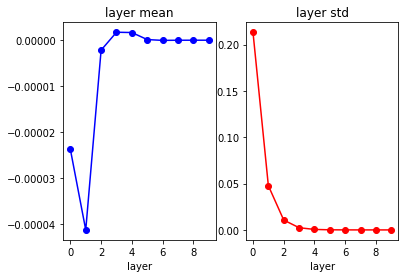

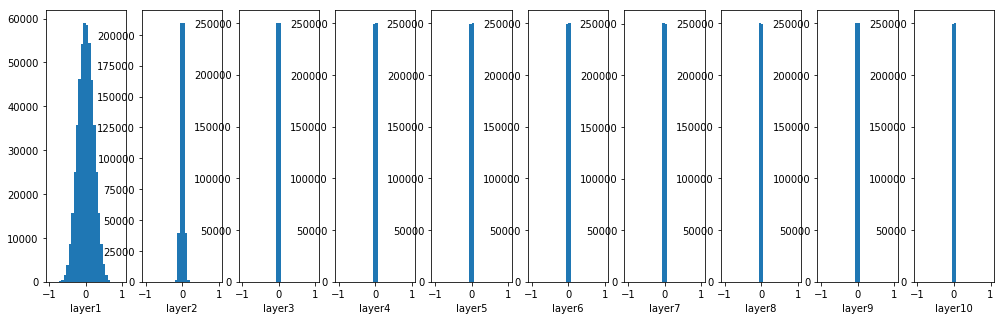

In [11]:
import tensorflow as tf
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)

D = np.random.randn(1000, 500)
hidden_layer_sizes = [500]*10

Hs = {}

for i in range(len(hidden_layer_sizes)):
    X = D if i==0 else Hs[i-1] # input at this layer
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]
    W = np.random.randn(fan_in, fan_out) * 0.01
    H = np.dot(X, W)
    H = np.tanh(H)
    Hs[i] = H

# look at distributions at each layer
print('input layer had mean %f and std %f'% (np.mean(D), np.std(D)))
layer_means = [np.mean(H) for i, H in Hs.items()]
layer_stds = [np.std(H) for i, H in Hs.items()]
for i, H in Hs.items():
    print('Hidden layer %d has mean %f and std %f' % (i+1, layer_means[i], layer_stds[i]))

# plot the means and standard deviations
plt.figure()
plt.subplot(121)
plt.plot(Hs.keys(), layer_means, 'ob-')
plt.xlabel('layer')
plt.title('layer mean')
plt.subplot(122)
plt.plot(Hs.keys(), layer_stds, 'or-')
plt.xlabel('layer')
plt.title('layer std')

# plot the raw distributions
plt.figure(figsize = (17, 5))
for i, H in Hs.items():
    plt.subplot(1, len(Hs), i+1)
    plt.hist(H.ravel(), 30, range=(-1, 1))
    plt.xlabel('layer' + str(i+1))

plt.show()


## 2. 가우시안 표준 정규 분포
Small random numbers로 변수 초기화를 할 경우에는 값이 계속해서 작아져서 0으로 수렴한다. 그럼 이번에는 평균이 0이고 표준편차가 1인 가우시안 표준 정규 분포를 한다면?

W = np.random.randn(fan_in, fan_out)


input layer had mean 0.002633 and std 0.999400
Hidden layer 1 has mean -0.001038 and std 0.982079
Hidden layer 2 has mean -0.000554 and std 0.981843
Hidden layer 3 has mean 0.002579 and std 0.981697
Hidden layer 4 has mean 0.000483 and std 0.981623
Hidden layer 5 has mean 0.002125 and std 0.981458
Hidden layer 6 has mean 0.001215 and std 0.981586
Hidden layer 7 has mean -0.001980 and std 0.981720
Hidden layer 8 has mean -0.001687 and std 0.981733
Hidden layer 9 has mean 0.002889 and std 0.981421
Hidden layer 10 has mean 0.002507 and std 0.981750


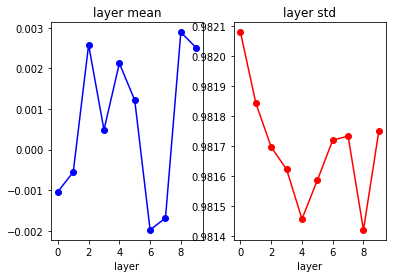

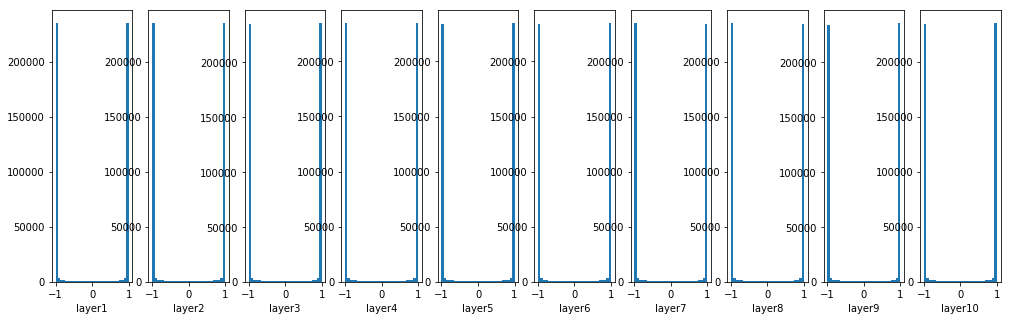

In [12]:
import tensorflow as tf
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)

D = np.random.randn(1000, 500)
hidden_layer_sizes = [500]*10

Hs = {}

for i in range(len(hidden_layer_sizes)):
    X = D if i==0 else Hs[i-1] # input at this layer
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]
    W = np.random.randn(fan_in, fan_out)
    H = np.dot(X, W)
    H = np.tanh(H)
    Hs[i] = H

# look at distributions at each layer
print('input layer had mean %f and std %f'% (np.mean(D), np.std(D)))
layer_means = [np.mean(H) for i, H in Hs.items()]
layer_stds = [np.std(H) for i, H in Hs.items()]
for i, H in Hs.items():
    print('Hidden layer %d has mean %f and std %f' % (i+1, layer_means[i], layer_stds[i]))

# plot the means and standard deviations
plt.figure()
plt.subplot(121)
plt.plot(Hs.keys(), layer_means, 'ob-')
plt.xlabel('layer')
plt.title('layer mean')
plt.subplot(122)
plt.plot(Hs.keys(), layer_stds, 'or-')
plt.xlabel('layer')
plt.title('layer std')

# plot the raw distributions
plt.figure(figsize = (17, 5))
for i, H in Hs.items():
    plt.subplot(1, len(Hs), i+1)
    plt.hist(H.ravel(), 30, range=(-1, 1))
    plt.xlabel('layer' + str(i+1))

plt.show()

## 3. Xavier initialization
Xavier initialization에서는 변수 초기화를 아래와 같이 한다. 간단한다. 표준 정규 분포를 입력 개수의(fan_in) 표준 편차로 나누어주면 된다. 

(단,activation 함수를 tanh를 쓴 것)


W = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in)



input layer had mean 0.002633 and std 0.999400
Hidden layer 1 has mean -0.000192 and std 0.627232
Hidden layer 2 has mean -0.000426 and std 0.486583
Hidden layer 3 has mean 0.000275 and std 0.407249
Hidden layer 4 has mean 0.000121 and std 0.357539
Hidden layer 5 has mean 0.000897 and std 0.320341
Hidden layer 6 has mean 0.000111 and std 0.293453
Hidden layer 7 has mean -0.000293 and std 0.272871
Hidden layer 8 has mean -0.000300 and std 0.254954
Hidden layer 9 has mean -0.000052 and std 0.239450
Hidden layer 10 has mean 0.000079 and std 0.226572


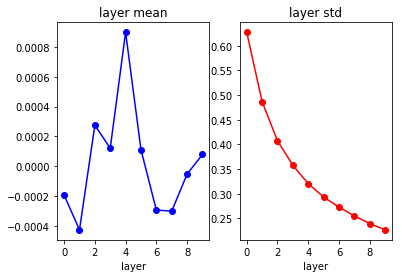

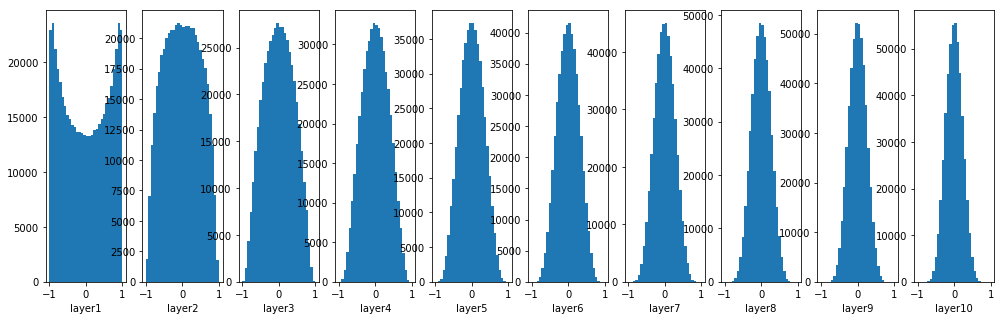

In [13]:
import tensorflow as tf
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)

D = np.random.randn(1000, 500)
hidden_layer_sizes = [500]*10

Hs = {}

for i in range(len(hidden_layer_sizes)):
    X = D if i==0 else Hs[i-1] # input at this layer
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]
    W = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in)
    H = np.dot(X, W)
    H = np.tanh(H)
    Hs[i] = H

# look at distributions at each layer
print('input layer had mean %f and std %f'% (np.mean(D), np.std(D)))
layer_means = [np.mean(H) for i, H in Hs.items()]
layer_stds = [np.std(H) for i, H in Hs.items()]
for i, H in Hs.items():
    print('Hidden layer %d has mean %f and std %f' % (i+1, layer_means[i], layer_stds[i]))

# plot the means and standard deviations
plt.figure()
plt.subplot(121)
plt.plot(Hs.keys(), layer_means, 'ob-')
plt.xlabel('layer')
plt.title('layer mean')
plt.subplot(122)
plt.plot(Hs.keys(), layer_stds, 'or-')
plt.xlabel('layer')
plt.title('layer std')

# plot the raw distributions
plt.figure(figsize = (17, 5))
for i, H in Hs.items():
    plt.subplot(1, len(Hs), i+1)
    plt.hist(H.ravel(), 30, range=(-1, 1))
    plt.xlabel('layer' + str(i+1))

plt.show()

## 4. Xavier initialization -> Relu 사용
Xavier initialization에서는 변수 초기화를 아래와 같이 한다. 간단한다. 표준 정규 분포를 입력 개수의(fan_in) 표준 편차로 나누어주면 된다. 

(단,activation 함수를 tanh를 쓴 것)


W = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in)

input layer had mean 0.002633 and std 0.999400
Hidden layer 1 has mean 0.563098 and std 0.824930
Hidden layer 2 has mean 0.552889 and std 0.819296
Hidden layer 3 has mean 0.521661 and std 0.782281
Hidden layer 4 has mean 0.526922 and std 0.763216
Hidden layer 5 has mean 0.491622 and std 0.744747
Hidden layer 6 has mean 0.528985 and std 0.767034
Hidden layer 7 has mean 0.539581 and std 0.798408
Hidden layer 8 has mean 0.518429 and std 0.764965
Hidden layer 9 has mean 0.532288 and std 0.758281
Hidden layer 10 has mean 0.535861 and std 0.764337
Hidden layer 11 has mean 0.516308 and std 0.774930
Hidden layer 12 has mean 0.507951 and std 0.745632
Hidden layer 13 has mean 0.515214 and std 0.746791
Hidden layer 14 has mean 0.535148 and std 0.748736
Hidden layer 15 has mean 0.478189 and std 0.731256
Hidden layer 16 has mean 0.509761 and std 0.781474
Hidden layer 17 has mean 0.520252 and std 0.781070
Hidden layer 18 has mean 0.565604 and std 0.809652
Hidden layer 19 has mean 0.552782 and std 0.

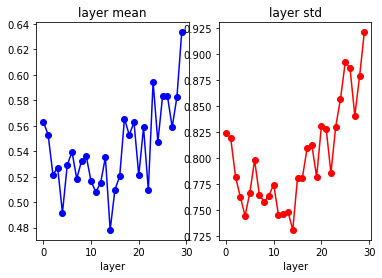

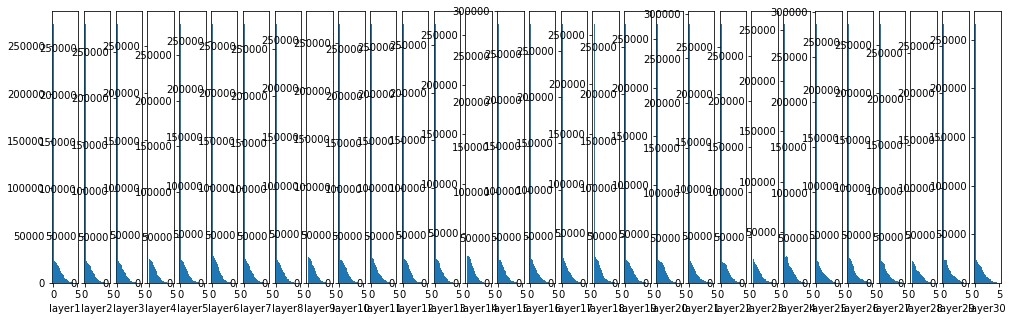

In [70]:
import tensorflow as tf
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)

D = np.random.randn(1000, 500)
hidden_layer_sizes = [500]*30

Hs = {}

for i in range(len(hidden_layer_sizes)):
    X = D if i==0 else Hs[i-1] # input at this layer
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]
    W = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in/2)  
    H = np.dot(X, W)
    H = np.maximum(0, H)
    Hs[i] = H

# look at distributions at each layer
print('input layer had mean %f and std %f'% (np.mean(D), np.std(D)))
layer_means = [np.mean(H) for i, H in Hs.items()]
layer_stds = [np.std(H) for i, H in Hs.items()]
for i, H in Hs.items():
    print('Hidden layer %d has mean %f and std %f' % (i+1, layer_means[i], layer_stds[i]))

# plot the means and standard deviations
plt.figure()
plt.subplot(121)
plt.plot(Hs.keys(), layer_means, 'ob-')
plt.xlabel('layer')
plt.title('layer mean')
plt.subplot(122)
plt.plot(Hs.keys(), layer_stds, 'or-')
plt.xlabel('layer')
plt.title('layer std')

# plot the raw distributions
plt.figure(figsize = (17, 5))
for i, H in Hs.items():
    plt.subplot(1, len(Hs), i+1)
    plt.hist(H.ravel(), 30, range=(0,5))
    plt.xlabel('layer' + str(i+1))

plt.show()